In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Display columns
print("Columns:\n", df.columns)

# Preview first few rows
df.head()


Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(20)

weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality_cumulative_per_million    337901
excess_mortality                           337901
excess_mortality_cumulative                337901
excess_mortality_cumulative_absolute       337901
weekly_hosp_admissions                     326832
weekly_hosp_admissions_per_million         326832
icu_patients_per_million                   312470
icu_patients                               312470
hosp_patients_per_million                  311183
hosp_patients                              311183
total_boosters                             302523
total_boosters_per_hundred                 302523
new_vaccinations                           284739
people_fully_vaccinated                    277510
people_fully_vaccinated_per_hundred        277510
new_tests                                  274682
new_tests_per_thousand                     274682
people_vaccinated                          274174


In [29]:
# Filter for countries of interest
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)].copy()

# Drop rows with missing date or total_cases
df_filtered.dropna(subset=['date', 'total_cases'], inplace=True)

# Convert 'date' to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Fill missing numeric values with forward fill method
df_filtered.ffill(inplace=True)

# Check cleaned data
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4040 entries, 139800 to 330865
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    4040 non-null   object        
 1   continent                                   4040 non-null   object        
 2   location                                    4040 non-null   object        
 3   date                                        4040 non-null   datetime64[ns]
 4   total_cases                                 4040 non-null   float64       
 5   new_cases                                   4040 non-null   float64       
 6   new_cases_smoothed                          4040 non-null   float64       
 7   total_deaths                                3997 non-null   float64       
 8   new_deaths                                  4040 non-null   float64       
 9   new_de

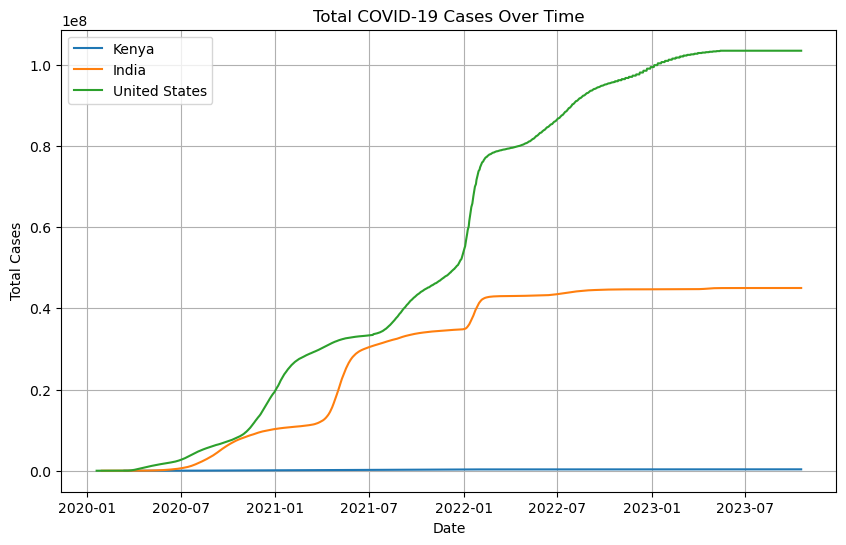

In [9]:
# Total cases over time
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid()
plt.show()


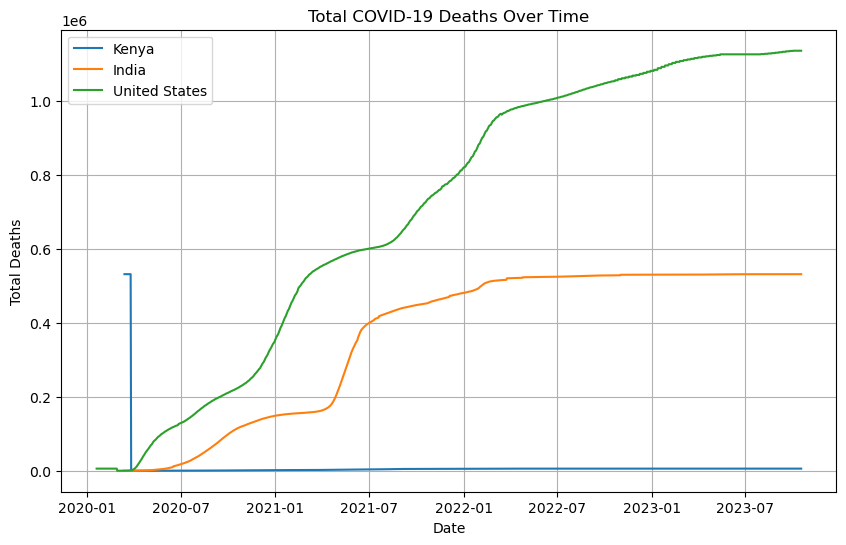

In [11]:
# Total deaths over time
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid()
plt.show()


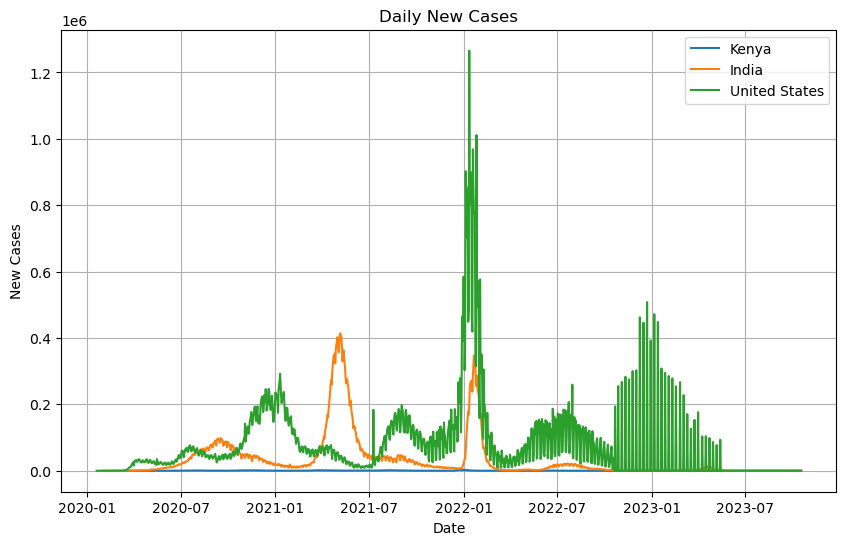

In [13]:
# Daily new cases
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title('Daily New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid()
plt.show()


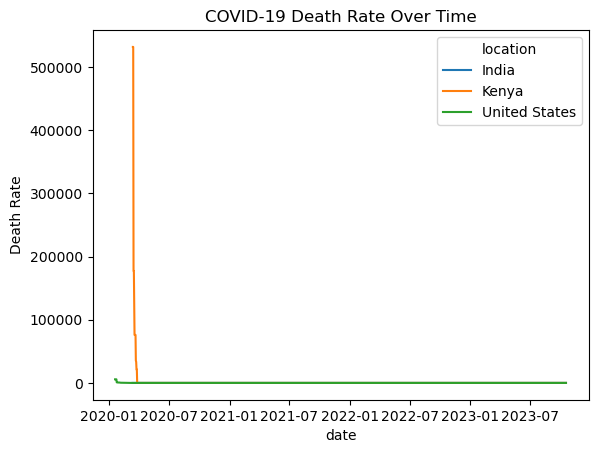

In [15]:
# Death Rate = total_deaths / total_cases
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
sns.lineplot(data=df_filtered, x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rate Over Time')
plt.ylabel('Death Rate')
plt.show()


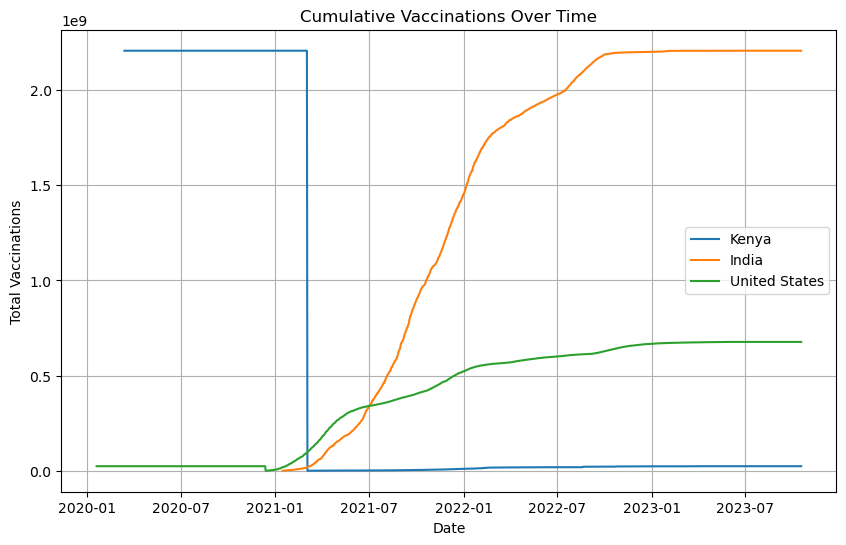

In [17]:
# Cumulative vaccinations
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title('Cumulative Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid()
plt.show()


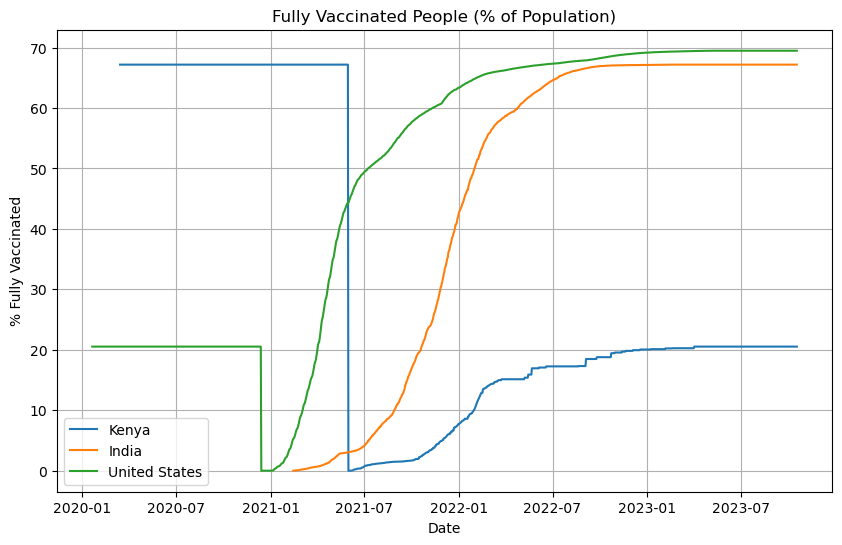

In [23]:
# Percent vaccinated
if 'people_fully_vaccinated_per_hundred' in df_filtered.columns:
    plt.figure(figsize=(10,6))
    for country in countries:
        subset = df_filtered[df_filtered['location'] == country]
        plt.plot(subset['date'], subset['people_fully_vaccinated_per_hundred'], label=country)
    plt.title('Fully Vaccinated People (% of Population)')
    plt.xlabel('Date')
    plt.ylabel('% Fully Vaccinated')
    plt.legend()
    plt.grid()
    plt.show()


## Insights from EDA

1. **India** showed a major spike in early 2021.
2. **United States** consistently had the highest number of total cases.
3. **Kenya** had fewer cases and a slower vaccination rollout.

We also observed a **declining death rate** in all countries after widespread vaccination.


## References

- Our World in Data COVID-19 Dataset: [Kaggle OWID COVID 19](https://www.kaggle.com/datasets/caesarmario/our-world-in-data-covid19-dataset)